# Part 1: Data Analysis

#### Data is provided from :https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being

In [63]:
#Importing necessaries
from pandas import read_csv , DataFrame , plotting , get_dummies , concat
from matplotlib.pyplot import pie , bar  , hist , show , xlabel , ylabel , title , figure
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


#Instancing from "LabelEncoder" and "StandardScaler" objects
encoder = LabelEncoder()
scaler = StandardScaler() 

In [64]:
#Data loading
file = read_csv('train.csv')
df = file.copy()
df.sample(10)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
904,904,28,Female,Instagram,200.0,8.0,110.0,40.0,45.0,Anxiety
995,995,26,Male,Instagram,150.0,5.0,70.0,25.0,30.0,Anxiety
440,441,31,Male,LinkedIn,45.0,1.0,9.0,4.0,10.0,Sadness
624,625,22,Female,Twitter,70.0,3.0,25.0,16.0,15.0,Sadness
39,40,28,Non-binary,Facebook,100.0,2.0,18.0,10.0,22.0,Anxiety
659,659,28,Female,Twitter,95.0,4.0,48.0,22.0,25.0,Happiness
981,981,31,Male,Telegram,50.0,2.0,20.0,10.0,12.0,Sadness
80,81,31,Male,Telegram,50.0,2.0,18.0,6.0,12.0,Sadness
641,Tabii,işte mevcut veri kümesini 1000 satıra tamamlı...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,260,Male,27,Facebook,60.0,1.0,12.0,5.0,15.0,Boredom


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [66]:
#Finding null value count
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [67]:
#Removing null values from dataframe
df = df.dropna()

#### It sounds something is wrong with "Age" column because its type is Object!

In [68]:
df.Age.unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary'],
      dtype=object)

In [69]:
#Making a temporary dataframe from Non-Numeric values in "Age" column
test = DataFrame([i for i in df.to_numpy() if i[1] in ['Male', 'Female', 'Non-binary']],columns=df.columns)
test

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
1,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
2,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
3,254,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
4,255,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...,...
71,784,Male,22,Twitter,70.0,1.0,22.0,7.0,22.0,Neutral
72,785,Non-binary,29,Facebook,75.0,2.0,20.0,8.0,20.0,Boredom
73,786,Female,28,Whatsapp,100.0,4.0,37.0,14.0,26.0,Anxiety
74,787,Male,31,Telegram,85.0,3.0,45.0,20.0,28.0,Sadness


####  According the above result, dataframe needs to be edited and some values in "Age" column must be replaced with values in "Gender" column

In [70]:
#Editing "Age" column
lst = list()
for i in df.to_numpy():
    try:
        #Check if value in "Age" column is a number, So the row don't need to be edited
        test = int(i[1])
        lst.append(i)
    except:
        #Editing row with Non-Numeric value in "Age" column
        test2 = list()
        for j in range(len(i)):
            if j==1:
                #Replacing Gender value with Age value
                test2.append(i[2])
            elif j==2:
                #Replacing Age value with Gender value
                test2.append(i[1])
            else :
                test2.append(i[j])
        lst.append(test2)

In [71]:
#Making a dataframe from tailored samples.
result = DataFrame(lst,columns=df.columns)

#Changing type of "Age" column.
result = result.astype({'Age':'float64'})

In [72]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [73]:
result.Age.unique()

array([25., 30., 22., 28., 33., 21., 27., 24., 29., 31., 23., 26., 34.,
       35., 32.])

In [74]:
#Random five samples of tailored dataframe
result.sample(5)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
5,6,21.0,Male,Instagram,150.0,4.0,60.0,15.0,25.0,Happiness
869,870,22.0,Non-binary,Snapchat,75.0,2.0,21.0,8.0,20.0,Sadness
293,294,29.0,Female,Snapchat,95.0,2.0,23.0,10.0,28.0,Sadness
725,726,31.0,Male,Facebook,80.0,2.0,20.0,10.0,20.0,Neutral
146,147,21.0,Female,Twitter,90.0,3.0,37.0,14.0,20.0,Sadness


#### Dataframe is tailored properly, So let's pursue to data analysis

In [75]:
result.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000
std,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


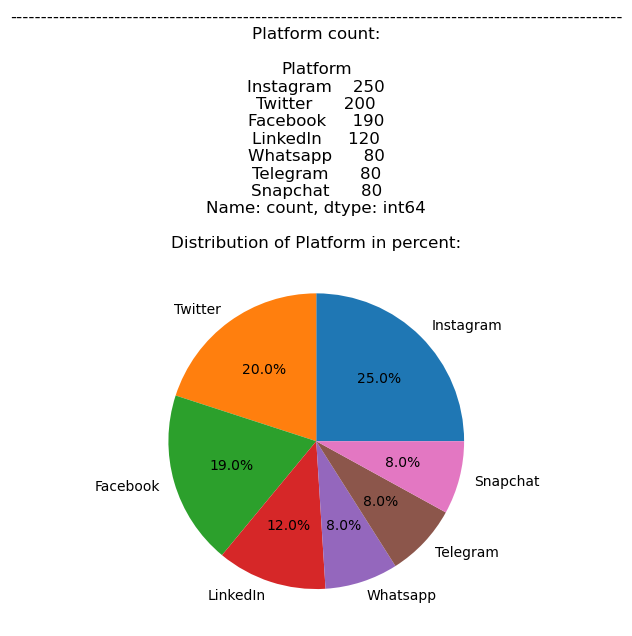

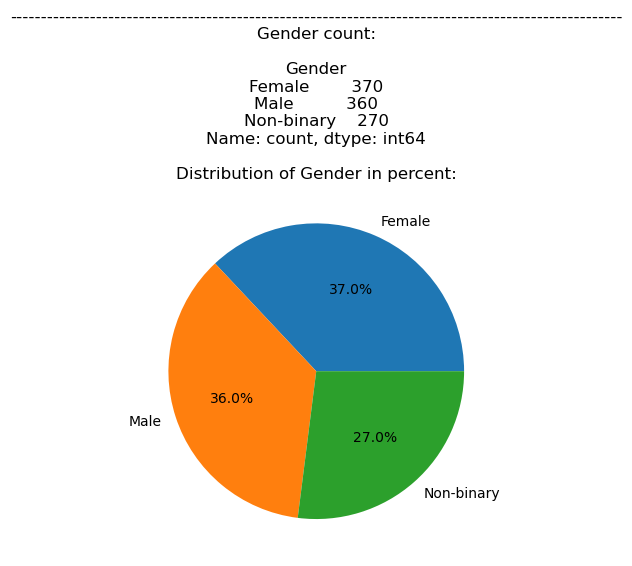

In [76]:
#Visualizing on "Platform" and "Gender" columns
for col in ['Platform','Gender']:
    pie(result[col].value_counts().values,labels=result[col].unique(),autopct='%1.1f%%')
    title(f'{"-"*100}\n{col} count:\n\n{result[col].value_counts()}\n\nDistribution of {col} in percent:')
    show()

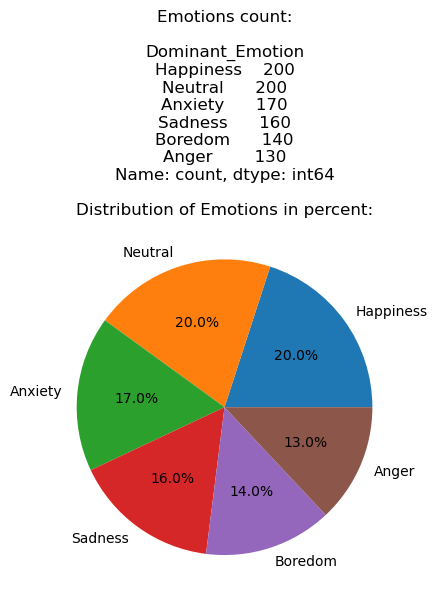

In [77]:
#Visualizing on "Emotions" column
pie(result.Dominant_Emotion.value_counts().values,labels=['Happiness','Neutral','Anxiety','Sadness','Boredom','Anger'],autopct='%1.1f%%')
title(f'Emotions count:\n\n{result.Dominant_Emotion.value_counts()}\n\nDistribution of Emotions in percent:')
show()

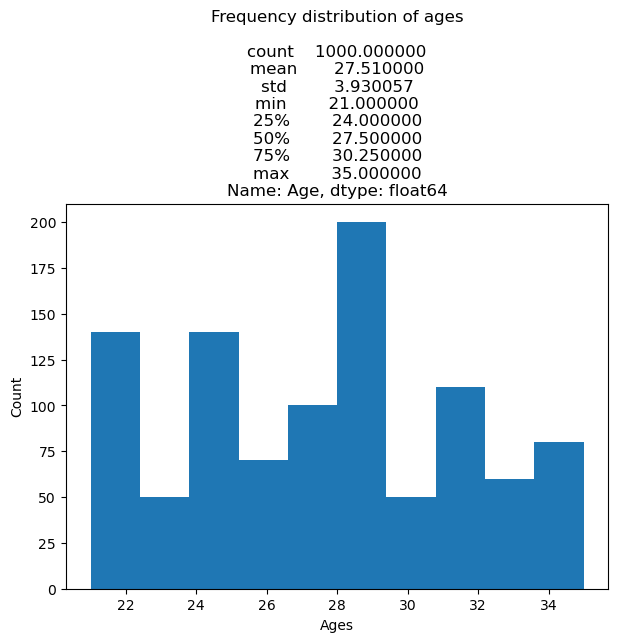

In [78]:
#Analyzing age range by a histogram
figure(figsize=(7,5))
hist(result.Age)
xlabel('Ages')
ylabel('Count')
title(f'Frequency distribution of ages\n\n{result.Age.describe()}')
show()

#### Emotions on each platform can be different, So let's find it by bar plots additionally some analysis on other factors

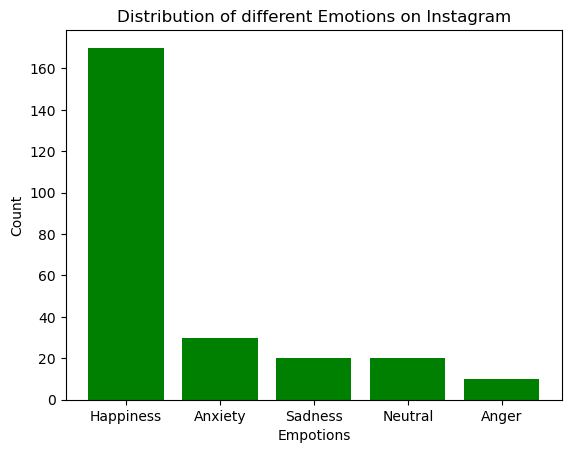

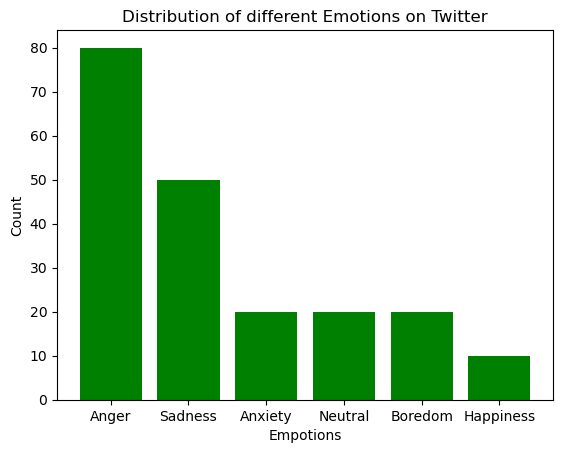

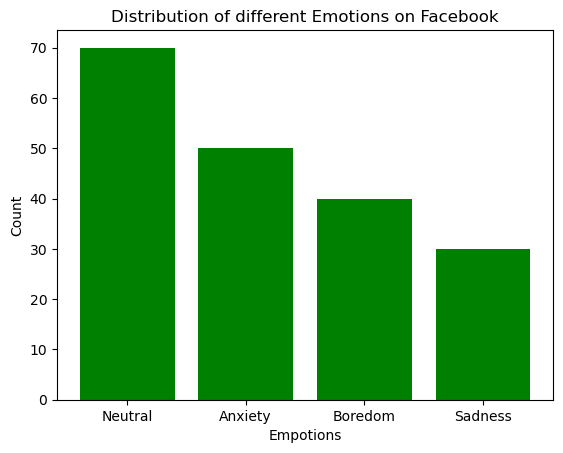

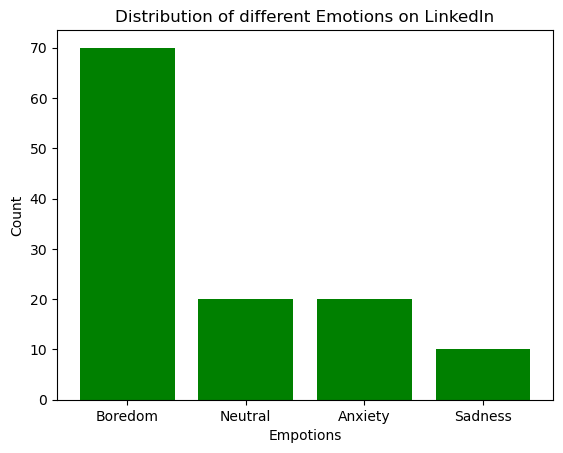

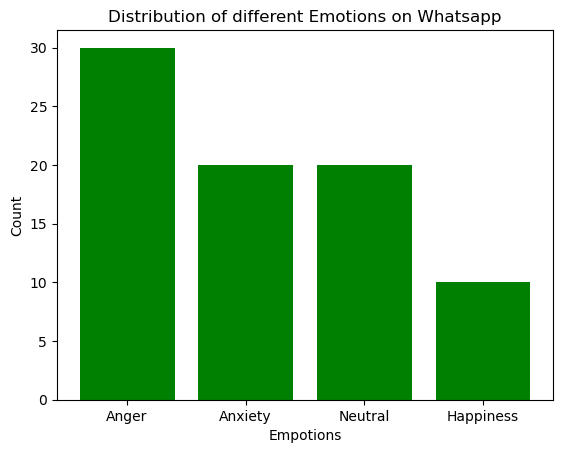

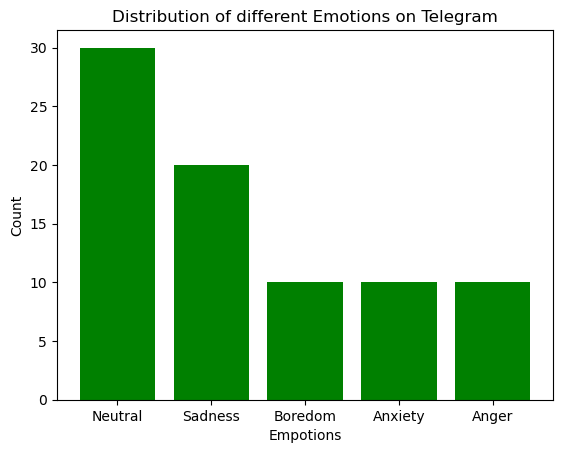

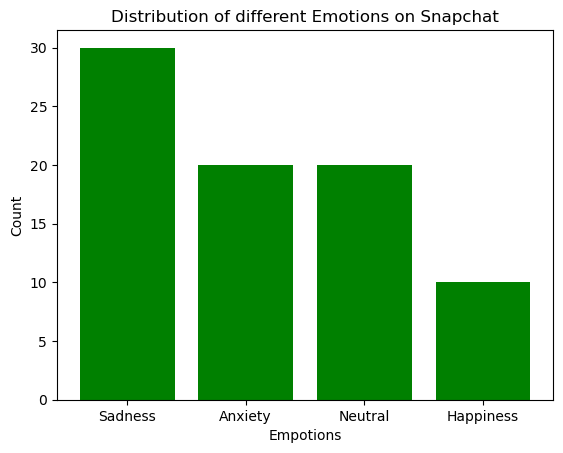

In [79]:
temp = list()
for p in result.Platform.unique():
    carrier = []
    
    #Adding platform name to temporary list
    carrier.append(p)

    #Making a dataframe from platform name
    temp_df = result[result.Platform==p]

    
    g_res = ''
    #Finding frequency of each gender in percent
    for g in temp_df.Gender.unique():
        g_percent = (temp_df.Gender.to_numpy().tolist().count(g)*100)/len(temp_df)
        g_res += f'{g} :{g_percent:0.1f}% '

    #Adding gender frequency percents to temporary list
    carrier.append(g_res)
    g_res = ''

    #Adding average of daily usage and average of ages to temporary list
    carrier.extend([temp_df['Daily_Usage_Time (minutes)'].mean() , int(temp_df['Age'].mean()) ])

    #Adding the temporary list to final list
    temp.append(carrier)

    #Visualizing on Distribution of different Emotions.
    bar(temp_df.Dominant_Emotion.value_counts().to_dict().keys(),temp_df.Dominant_Emotion.value_counts().values,color='green')
    xlabel('Empotions')
    ylabel('Count')
    title(f'Distribution of different Emotions on {p}')
    show()

#Making a dataframe from temp list as final result
temp = DataFrame(temp,columns=['Platform','Gender percents','Daily Usage Time average','Age average'])

In [80]:
temp

,Platform,Gender percents,Daily Usage Time average,Age average
0,Instagram,Female :64.0% Male :32.0% Non-binary :4.0%,153.400000,28
1,Twitter,Male :55.0% Female :35.0% Non-binary :10.0%,83.750000,26
2,Facebook,Non-binary :73.7% Male :21.1% Female :5.3%,72.105263,26
3,LinkedIn,Male :41.7% Female :33.3% Non-binary :25.0%,55.833333,29
4,Whatsapp,Female :75.0% Male :25.0%,87.500000,28
5,Telegram,Male :75.0% Non-binary :25.0%,78.125000,28
6,Snapchat,Non-binary :62.5% Female :37.5%,90.000000,25


#### In order to get information from each gender separately it's necessary to make separately dataframes

In [81]:
for g in result.Gender.unique():
    #Make an unique dataframe from each gender
    temp = result[result.Gender==g]

    #Calculating age average and daily usage average
    print(f'{g} users with average age {int(temp.Age.mean())} use social medias {int(temp["Daily_Usage_Time (minutes)"].mean())} minutes daily average.')
    print('\n----------------------------------------------')

Female users with average age 27 use social medias 112 minutes daily average.

----------------------------------------------
Male users with average age 28 use social medias 94 minutes daily average.

----------------------------------------------
Non-binary users with average age 26 use social medias 75 minutes daily average.

----------------------------------------------


#### Finding correlation between numeric columns by scatter plots.

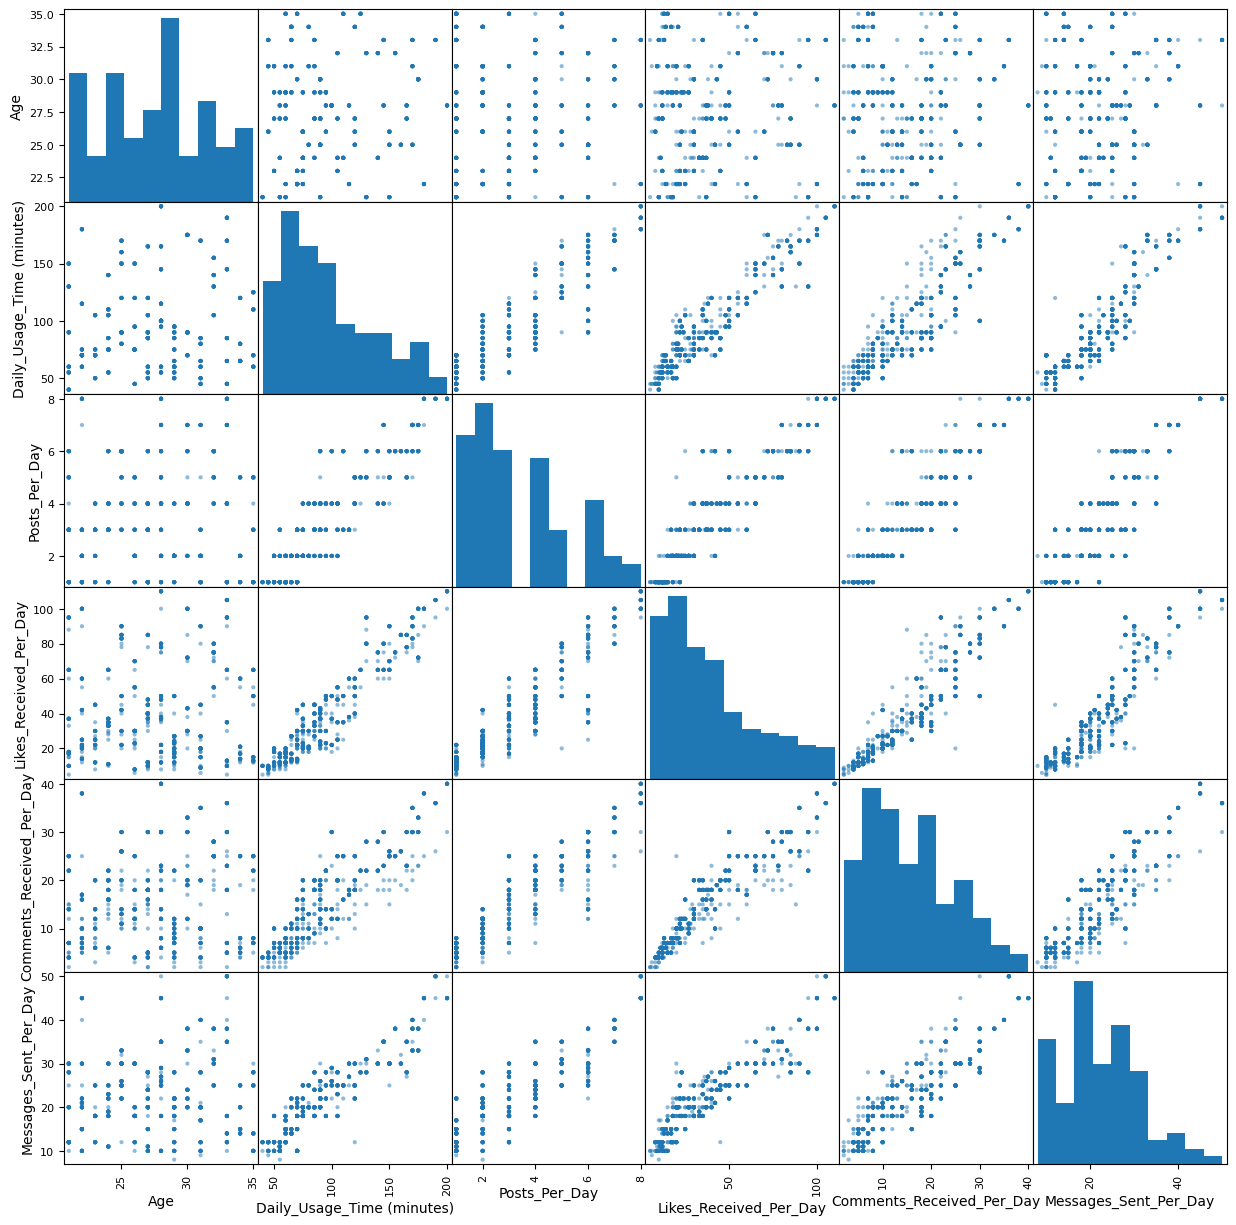

In [82]:
#Making a dataframe from Non-Numeric columns
temp = result[[col for col in result.columns if result[col].dtype!='O']]

#Visualize correlation by scatter plots
plotting.scatter_matrix(temp,figsize=(15,15))
show()

  # End of Part 1

# Part 2: Machine Learning

 #### Part 2 Phase 1: Data preprocessing

In [83]:
#Split and encode target column
label = encoder.fit_transform(result.Dominant_Emotion)

#Removing target column and "User_ID" column from dataframe
result = result.drop(['User_ID','Dominant_Emotion'],axis=1)

In [84]:
#Making a dataframe from numeric values
num_df = result.drop([col for col in result.columns if result[col].dtype=='O'],axis=1)

#Making a dataframe from Non-Numeric values
nan_df = result.drop([col for col in result.columns if result[col].dtype!='O'],axis=1)

In [85]:
#Encoding dataframe that contains Non-Numeric values
encoded_df = get_dummies(nan_df)

#Scaling dataframe that contains numeric values
scaled_df = DataFrame(scaler.fit_transform(num_df),columns=num_df.columns)

In [86]:
#Create an unique dataframe
final = concat([encoded_df,scaled_df],axis=1)

In [87]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender_Female               1000 non-null   bool   
 1   Gender_Male                 1000 non-null   bool   
 2   Gender_Non-binary           1000 non-null   bool   
 3   Platform_Facebook           1000 non-null   bool   
 4   Platform_Instagram          1000 non-null   bool   
 5   Platform_LinkedIn           1000 non-null   bool   
 6   Platform_Snapchat           1000 non-null   bool   
 7   Platform_Telegram           1000 non-null   bool   
 8   Platform_Twitter            1000 non-null   bool   
 9   Platform_Whatsapp           1000 non-null   bool   
 10  Age                         1000 non-null   float64
 11  Daily_Usage_Time (minutes)  1000 non-null   float64
 12  Posts_Per_Day               1000 non-null   float64
 13  Likes_Received_Per_Day      1000 n

In [88]:
#Splitting data to train and test sets
#80% of data is considered as train set
xtr , xts , ytr , yts = train_test_split(final,label,test_size=0.2,random_state=32)
print(f'Train set shape :{xtr.shape}\nTest set shape: {xts.shape}')

Train set shape :(800, 16)
Test set shape: (200, 16)


#### Part 2 Phase 2: Modeling and evaluating

In [89]:
#Collecting some famous classifiers in a list
models = [DecisionTreeClassifier,
          ExtraTreesClassifier ,
          RandomForestClassifier ,
          GradientBoostingClassifier,
          KNeighborsClassifier,
          XGBClassifier,
          CatBoostClassifier,
          LGBMClassifier]

res = list()
confusion_matrixs = list()
for algorithm in models:
    carrier = []

    #make an instance from each model and train it with train set
    model = algorithm()
    model.fit(xtr,ytr)

    #Saving scores on train set and test set in a temporary list 
    carrier.extend((str(algorithm).split('.')[-1][:-2],model.score(xtr,ytr)*100,model.score(xts,yts)*100))

    #Predicting test set
    pred = model.predict(xts)

    #Create a confusion matrix from predictions and real labels then save it in temporary list
    con = confusion_matrix(yts,pred)
    confusion_matrixs.append(con)

    #Train the model with total data and saving its accuracy
    model.fit(final,label)
    carrier.append(model.score(final,label)*100)

    #Save the temporary list in another list
    res.append(carrier)

#Making a dataframe from results of the loop that contains accuracy scores
res = DataFrame(res, columns=['Model','Accuracy on train set','Accuracy on test set','Accuracy on total data'])

Learning rate set to 0.078231
0:	learn: 1.7039465	total: 4.21ms	remaining: 4.2s
1:	learn: 1.6349023	total: 7.69ms	remaining: 3.84s
2:	learn: 1.5664943	total: 11.2ms	remaining: 3.71s
3:	learn: 1.5053844	total: 14.8ms	remaining: 3.68s
4:	learn: 1.4558422	total: 18.2ms	remaining: 3.63s
5:	learn: 1.4001987	total: 21.9ms	remaining: 3.63s
6:	learn: 1.3638260	total: 25.4ms	remaining: 3.6s
7:	learn: 1.3160269	total: 28.6ms	remaining: 3.55s
8:	learn: 1.2756189	total: 32.4ms	remaining: 3.57s
9:	learn: 1.2393336	total: 35.9ms	remaining: 3.55s
10:	learn: 1.2065962	total: 39.5ms	remaining: 3.55s
11:	learn: 1.1758414	total: 43ms	remaining: 3.54s
12:	learn: 1.1513603	total: 46.1ms	remaining: 3.5s
13:	learn: 1.1196722	total: 49.3ms	remaining: 3.47s
14:	learn: 1.0884716	total: 52.6ms	remaining: 3.45s
15:	learn: 1.0633520	total: 55.5ms	remaining: 3.41s
16:	learn: 1.0307021	total: 59.3ms	remaining: 3.43s
17:	learn: 1.0115483	total: 63.3ms	remaining: 3.45s
18:	learn: 0.9964958	total: 66.4ms	remaining: 3.4

In [90]:
res

,Model,Accuracy on train set,Accuracy on test set,Accuracy on total data
0,DecisionTreeClassifier,100.0,95.5,100.0
1,ExtraTreesClassifier,100.0,98.0,100.0
2,RandomForestClassifier,100.0,98.0,100.0
3,GradientBoostingClassifier,100.0,97.5,100.0
4,KNeighborsClassifier,99.5,99.5,99.5
5,XGBClassifier,100.0,98.5,100.0
6,CatBoostClassifier,100.0,99.0,100.0
7,LGBMClassifier,100.0,99.5,100.0


#### It sounds Light GBM classifier had the best result so let's take look to its confusion matrix

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrixs[6])

Text(0.5, 1.0, 'LGBMClassifier')

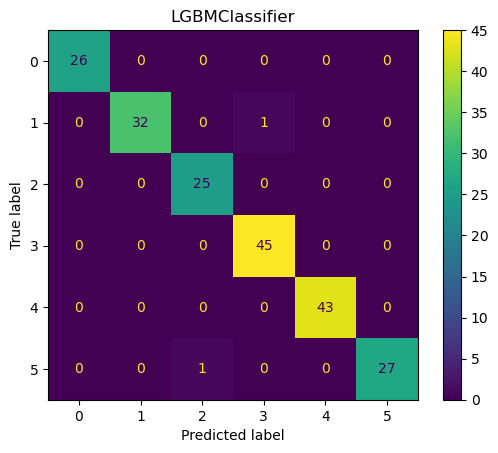

In [92]:
disp.plot()
title('LGBMClassifier')

# End